In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [3]:
df = pd.read_csv('Unified-1.csv', low_memory = False)

In [4]:
df.isna()

,DATE,TIME,STATION,LATITUDE,LONGITUDE,ELEVATION,TEMPERATURE,RELATIVE HUMIDITY,ACTUAL VAPOR PRESSURE,DEWPOINT TEMPERATURE,WIND DIRECTION,WIND GUST,WIND SPEED,GLOBAL SOLAR RADIATION,SOLAR RADIATION/MIN,PRECIPITATION,BAROMETRIC PRESSURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
131209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
131210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
131211,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [4]:
df.dtypes

DATE                       object
TIME                       object
STATION                    object
LATITUDE                   object
LONGITUDE                  object
ELEVATION                  object
TEMPERATURE                object
RELATIVE HUMIDITY          object
ACTUAL VAPOR PRESSURE     float64
DEWPOINT TEMPERATURE       object
WIND DIRECTION            float64
WIND GUST                 float64
WIND SPEED                float64
GLOBAL SOLAR RADIATION    float64
SOLAR RADIATION/MIN       float64
PRECIPITATION             float64
BAROMETRIC PRESSURE       float64
dtype: object

In [5]:
date_obj = pd.to_datetime(df['DATE'], format ='%m/%d/%Y')
df['date']= date_obj

df['hour'] = df['TIME'].str.split(':').apply(lambda x: int(x[0]) + int(x[1]) / 60)
df.dtypes

DATE                              object
TIME                              object
STATION                           object
LATITUDE                          object
LONGITUDE                         object
ELEVATION                         object
TEMPERATURE                       object
RELATIVE HUMIDITY                 object
ACTUAL VAPOR PRESSURE            float64
DEWPOINT TEMPERATURE              object
WIND DIRECTION                   float64
WIND GUST                        float64
WIND SPEED                       float64
GLOBAL SOLAR RADIATION           float64
SOLAR RADIATION/MIN              float64
PRECIPITATION                    float64
BAROMETRIC PRESSURE              float64
date                      datetime64[ns]
hour                             float64
dtype: object

In [6]:
df['TEMPERATURE'] = df['TEMPERATURE'].str.replace('-', ' ').str.replace('+', ' ')
df['RELATIVE HUMIDITY'] = df['RELATIVE HUMIDITY'].str.replace('-', ' ').str.replace('+', ' ')
df['DEWPOINT TEMPERATURE'] = df['DEWPOINT TEMPERATURE'].str.replace('-', ' ').str.replace('+', ' ')

df[['TEMPERATURE', 'RELATIVE HUMIDITY', 'DEWPOINT TEMPERATURE']] = df[['TEMPERATURE', 'RELATIVE HUMIDITY', 'DEWPOINT TEMPERATURE']].astype(float)


In [7]:
df[['TEMPERATURE', 'RELATIVE HUMIDITY', 'DEWPOINT TEMPERATURE']] = df[['TEMPERATURE', 'RELATIVE HUMIDITY', 'DEWPOINT TEMPERATURE']].astype(float)


In [8]:
df.fillna(value = 0, inplace = True)
df

,DATE,TIME,STATION,LATITUDE,LONGITUDE,ELEVATION,TEMPERATURE,RELATIVE HUMIDITY,ACTUAL VAPOR PRESSURE,DEWPOINT TEMPERATURE,WIND DIRECTION,WIND GUST,WIND SPEED,GLOBAL SOLAR RADIATION,SOLAR RADIATION/MIN,PRECIPITATION,BAROMETRIC PRESSURE,date,hour
0,01/01/2019,0:00,Grand Coulee Dam,47.94527 N,-118.95361 W,1320',27.13,78.57,0.39,21.35,200.1,5.92,2.00,2343.0,0.0,12.98,30.41,2019-01-01,0.0
1,01/01/2019,1:00,Grand Coulee Dam,47.94527 N,-118.95361 W,1320',27.55,76.13,0.39,21.03,253.4,5.48,2.54,2343.0,0.0,12.98,30.40,2019-01-01,1.0
2,01/01/2019,2:00,Grand Coulee Dam,47.94527 N,-118.95361 W,1320',27.20,74.20,0.37,20.08,295.2,3.51,1.87,2343.0,0.0,12.98,30.40,2019-01-01,2.0
3,01/01/2019,3:00,Grand Coulee Dam,47.94527 N,-118.95361 W,1320',27.41,77.32,0.39,21.25,260.2,4.16,2.10,2343.0,0.0,12.98,30.39,2019-01-01,3.0
4,01/01/2019,4:00,Grand Coulee Dam,47.94527 N,-118.95361 W,1320',28.04,79.24,0.41,22.44,166.1,3.95,1.22,2343.0,0.0,12.98,30.37,2019-01-01,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131208,01/01/2022,19:00,Entiat Fish Hatchery,47.69796 N,-120.32373 W,1033',12.60,82.60,0.22,8.31,197.7,0.88,0.10,5763.0,0.0,9.28,0.00,2022-01-01,19.0
131209,01/01/2022,20:00,Entiat Fish Hatchery,47.69796 N,-120.32373 W,1033',12.83,78.70,0.21,7.45,337.1,3.95,1.50,5763.0,0.0,9.29,0.00,2022-01-01,20.0
131210,01/01/2022,21:00,Entiat Fish Hatchery,47.69796 N,-120.32373 W,1033',12.73,76.28,0.21,6.68,320.5,4.16,1.91,5763.0,0.0,9.29,0.00,2022-01-01,21.0
131211,01/01/2022,22:00,Entiat Fish Hatchery,47.69796 N,-120.32373 W,1033',11.19,78.99,0.20,5.94,336.2,4.38,1.65,5763.0,0.0,9.28,0.00,2022-01-01,22.0


In [13]:
data = df[['date','hour','TEMPERATURE','RELATIVE HUMIDITY','ACTUAL VAPOR PRESSURE','DEWPOINT TEMPERATURE','WIND DIRECTION','WIND GUST','WIND SPEED','GLOBAL SOLAR RADIATION','SOLAR RADIATION/MIN','PRECIPITATION','BAROMETRIC PRESSURE']]
corr=data.corr()

corr.style.background_gradient(cmap='coolwarm')

,date,hour,TEMPERATURE,RELATIVE HUMIDITY,ACTUAL VAPOR PRESSURE,DEWPOINT TEMPERATURE,WIND DIRECTION,WIND GUST,WIND SPEED,GLOBAL SOLAR RADIATION,SOLAR RADIATION/MIN,PRECIPITATION,BAROMETRIC PRESSURE
date,1.000000,-0.000156,0.090320,-0.079954,0.047760,0.073444,0.017504,0.045094,0.034027,0.005695,-0.011046,-0.378365,-0.001477
hour,-0.000156,1.000000,0.183384,-0.237625,-0.014272,-0.014094,0.036769,0.114133,0.088497,0.000458,0.131978,-0.000190,-0.000473
TEMPERATURE,0.090320,0.183384,1.000000,-0.713021,0.685193,0.655941,0.043059,0.227155,0.135613,-0.018889,0.507080,-0.081333,0.064260
RELATIVE HUMIDITY,-0.079954,-0.237625,-0.713021,1.000000,-0.069205,-0.143453,-0.064601,-0.400946,-0.298641,0.035822,-0.535021,0.033111,-0.078074
ACTUAL VAPOR PRESSURE,0.047760,-0.014272,0.685193,-0.069205,1.000000,0.867770,-0.004278,-0.062058,-0.079683,0.001996,0.131896,-0.085201,0.008096
DEWPOINT TEMPERATURE,0.073444,-0.014094,0.655941,-0.143453,0.867770,1.000000,-0.016567,-0.080949,-0.103255,-0.034845,0.113466,-0.101919,-0.018845
WIND DIRECTION,0.017504,0.036769,0.043059,-0.064601,-0.004278,-0.016567,1.000000,0.046286,0.002343,-0.012913,-0.022604,0.030256,0.093632
WIND GUST,0.045094,0.114133,0.227155,-0.400946,-0.062058,-0.080949,0.046286,1.000000,0.919550,-0.000419,0.227445,-0.024403,0.228679
WIND SPEED,0.034027,0.088497,0.135613,-0.298641,-0.079683,-0.103255,0.002343,0.919550,1.000000,0.001995,0.176437,-0.070625,0.341100
GLOBAL SOLAR RADIATION,0.005695,0.000458,-0.018889,0.035822,0.001996,-0.034845,-0.012913,-0.000419,0.001995,1.000000,-0.009395,0.002232,-0.004539


In [14]:
df['date_float']= df['date'].astype('int64')/10**9

In [16]:
X = df[['date_float','hour','TEMPERATURE', 'RELATIVE HUMIDITY', 'ACTUAL VAPOR PRESSURE', 'DEWPOINT TEMPERATURE', 'WIND DIRECTION', 'WIND GUST', 'WIND SPEED','SOLAR RADIATION/MIN','PRECIPITATION', 'BAROMETRIC PRESSURE']].values
y = df['GLOBAL SOLAR RADIATION'].values.reshape(-1, 1)  
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=70)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=70)


# Standardize features
scaler1 = StandardScaler()
scaler2 = StandardScaler()
X_train_scaled = scaler1.fit_transform(X_train)
X_val_scaled = scaler1.transform(X_val)
X_test_scaled = scaler1.transform(X_test)
y_train_scaled = scaler2.fit_transform(y_train)
y_val_scaled = scaler2.transform(y_val)
y_test_scaled = scaler2.transform(y_test)

#print(f"{X_train.shape} {X_val.shape} :: {X_test.shape}" )


In [17]:
# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

w_d = 0.01
Epoch [10/100], Train Loss: 0.9939, Valid Loss: 0.9909
Epoch [20/100], Train Loss: 0.9877, Valid Loss: 0.9868
Epoch [30/100], Train Loss: 0.9850, Valid Loss: 0.9825
Epoch [40/100], Train Loss: 0.9844, Valid Loss: 0.9799
Epoch [50/100], Train Loss: 0.9828, Valid Loss: 0.9790
Epoch [60/100], Train Loss: 0.9827, Valid Loss: 0.9751
Epoch [70/100], Train Loss: 0.9832, Valid Loss: 0.9764
Epoch [80/100], Train Loss: 0.9833, Valid Loss: 0.9743
Epoch [90/100], Train Loss: 0.9830, Valid Loss: 0.9760
Epoch [100/100], Train Loss: 0.9833, Valid Loss: 0.9743
Train Loss: 0.9724
Validation Loss: 0.9743


In [65]:
import torch.nn.functional as F

class ComplexModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)  # Batch normalization
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)  # Batch normalization
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.bn3 = nn.BatchNorm1d(hidden_size)  # Batch normalization
        self.out = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(0.2)  # Dropout with 50% probability
        
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = self.out(x)
        return x



Epoch [1/100], Train Loss: 1.2809, Valid Loss: 1.0077, Test Loss: 1.0081
Epoch [2/100], Train Loss: 1.1005, Valid Loss: 0.9975, Test Loss: 0.9983
Epoch [3/100], Train Loss: 1.0512, Valid Loss: 0.9939, Test Loss: 0.9950
Epoch [4/100], Train Loss: 1.0244, Valid Loss: 0.9929, Test Loss: 0.9940
Epoch [5/100], Train Loss: 1.0115, Valid Loss: 0.9920, Test Loss: 0.9932
Epoch [6/100], Train Loss: 1.0058, Valid Loss: 0.9913, Test Loss: 0.9923
Epoch [7/100], Train Loss: 0.9992, Valid Loss: 0.9907, Test Loss: 0.9918
Epoch [8/100], Train Loss: 0.9974, Valid Loss: 0.9908, Test Loss: 0.9919
Epoch [9/100], Train Loss: 0.9952, Valid Loss: 0.9902, Test Loss: 0.9913
Epoch [10/100], Train Loss: 0.9944, Valid Loss: 0.9901, Test Loss: 0.9912
Epoch [11/100], Train Loss: 0.9934, Valid Loss: 0.9900, Test Loss: 0.9911
Epoch [12/100], Train Loss: 0.9927, Valid Loss: 0.9894, Test Loss: 0.9905
Epoch [13/100], Train Loss: 0.9921, Valid Loss: 0.9890, Test Loss: 0.9902
Epoch [14/100], Train Loss: 0.9915, Valid Loss:

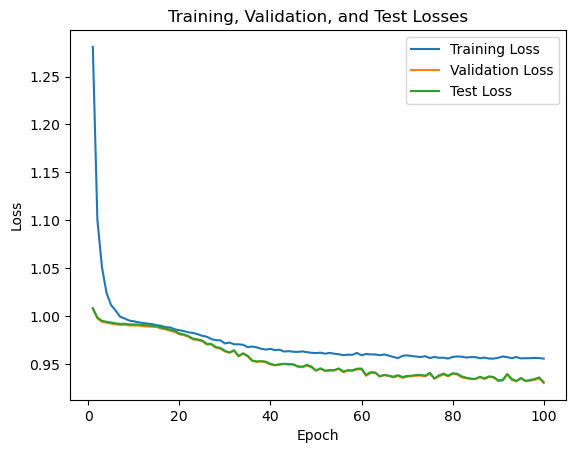

In [73]:
# Parameters
batch_size = 65
input_size = X_train_tensor.shape[1]
hidden_size = 38  # Number of neurons in the hidden layer
output_size = 1  # As a regression task
learning_rate = 0.0001
model = ComplexModel(input_size, hidden_size, output_size)

# Create data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Xavier initialization
for layer in [model.fc1, model.fc2, model.fc3, model.out]:
    nn.init.xavier_uniform_(layer.weight)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Using Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.01)




# Training loop Validation and Test loop
train_losses = []
valid_losses = []
test_losses = []

num_epochs = 100
for epoch in range(num_epochs):
    train_loss = 0
    valid_loss = 0
    test_loss = 0
    
    model.train()  
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    model.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item() * inputs.size(0)
            
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
    
    # Calculate average loss per sample for the epoch
    train_loss /= len(train_loader.dataset)
    valid_loss /= len(val_loader.dataset)
    test_loss /= len(test_loader.dataset)
    
    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}, Test Loss: {test_loss:.4f}')
    
    # Append losses to the lists
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    test_losses.append(test_loss)

# Evaluation 
model.eval()  
with torch.no_grad():
    train_loss = 0
    for inputs, labels in train_loader:
        outputs = model(inputs)
        train_loss += criterion(outputs, labels).item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    print(f'Train Loss: {train_loss:.4f}')

model.eval()  
with torch.no_grad():
    val_loss = 0
    for inputs, labels in val_loader:
        outputs = model(inputs)
        val_loss += criterion(outputs, labels).item() * inputs.size(0)
    val_loss /= len(val_loader.dataset)
    print(f'Validation Loss: {val_loss:.4f}')

model.eval()  
with torch.no_grad():
    test_loss = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        test_loss += criterion(outputs, labels).item() * inputs.size(0)
    test_loss /= len(test_loader.dataset)
    print(f'Test Loss: {test_loss:.4f}')

import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), valid_losses, label='Validation Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Losses')
plt.legend()
plt.show()


Epoch [1/100], Train Loss: 1.5104, Valid Loss: 1.0187, Test Loss: 1.0209
Epoch [2/100], Train Loss: 1.1653, Valid Loss: 1.0022, Test Loss: 1.0033
Epoch [3/100], Train Loss: 1.0782, Valid Loss: 0.9970, Test Loss: 0.9980
Epoch [4/100], Train Loss: 1.0412, Valid Loss: 0.9936, Test Loss: 0.9948
Epoch [5/100], Train Loss: 1.0202, Valid Loss: 0.9930, Test Loss: 0.9942
Epoch [6/100], Train Loss: 1.0085, Valid Loss: 0.9917, Test Loss: 0.9927
Epoch [7/100], Train Loss: 1.0013, Valid Loss: 0.9909, Test Loss: 0.9919
Epoch [8/100], Train Loss: 0.9993, Valid Loss: 0.9904, Test Loss: 0.9914
Epoch [9/100], Train Loss: 0.9958, Valid Loss: 0.9904, Test Loss: 0.9916
Epoch [10/100], Train Loss: 0.9946, Valid Loss: 0.9897, Test Loss: 0.9909
Epoch [11/100], Train Loss: 0.9933, Valid Loss: 0.9892, Test Loss: 0.9904
Epoch [12/100], Train Loss: 0.9933, Valid Loss: 0.9891, Test Loss: 0.9903
Epoch [13/100], Train Loss: 0.9911, Valid Loss: 0.9887, Test Loss: 0.9899
Epoch [14/100], Train Loss: 0.9908, Valid Loss:

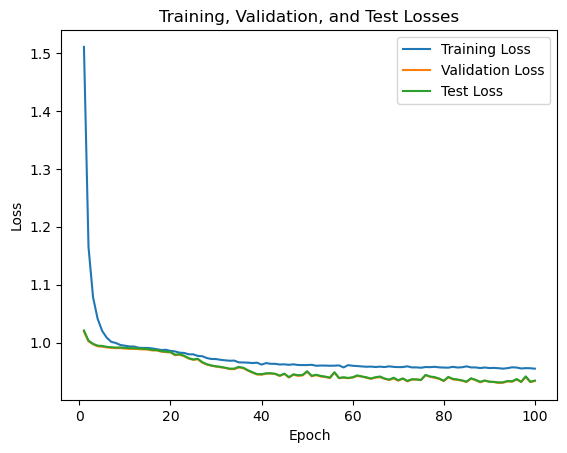

In [75]:
# Parameters
batch_size = 62
input_size = X_train_tensor.shape[1]
hidden_size = 40  # Number of neurons in the hidden layer
output_size = 1  # As a regression task
learning_rate = 0.0001
model = ComplexModel(input_size, hidden_size, output_size)

# Create data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Xavier initialization
for layer in [model.fc1, model.fc2, model.fc3, model.out]:
    nn.init.xavier_uniform_(layer.weight)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Using Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.01)




# Training loop Validation and Test loop
train_losses = []
valid_losses = []
test_losses = []

num_epochs = 100
for epoch in range(num_epochs):
    train_loss = 0
    valid_loss = 0
    test_loss = 0
    
    model.train()  
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    model.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item() * inputs.size(0)
            
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
    
    # Calculate average loss per sample for the epoch
    train_loss /= len(train_loader.dataset)
    valid_loss /= len(val_loader.dataset)
    test_loss /= len(test_loader.dataset)
    
    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}, Test Loss: {test_loss:.4f}')
    
    # Append losses to the lists
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    test_losses.append(test_loss)

# Evaluation 
model.eval()  
with torch.no_grad():
    train_loss = 0
    for inputs, labels in train_loader:
        outputs = model(inputs)
        train_loss += criterion(outputs, labels).item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    print(f'Train Loss: {train_loss:.4f}')

model.eval()  
with torch.no_grad():
    val_loss = 0
    for inputs, labels in val_loader:
        outputs = model(inputs)
        val_loss += criterion(outputs, labels).item() * inputs.size(0)
    val_loss /= len(val_loader.dataset)
    print(f'Validation Loss: {val_loss:.4f}')

model.eval()  
with torch.no_grad():
    test_loss = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        test_loss += criterion(outputs, labels).item() * inputs.size(0)
    test_loss /= len(test_loader.dataset)
    print(f'Test Loss: {test_loss:.4f}')

import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), valid_losses, label='Validation Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Losses')
plt.legend()
plt.show()


Epoch [1/100], Train Loss: 1.5115, Valid Loss: 1.0260, Test Loss: 1.0278
Epoch [2/100], Train Loss: 1.1383, Valid Loss: 1.0061, Test Loss: 1.0079
Epoch [3/100], Train Loss: 1.0670, Valid Loss: 0.9984, Test Loss: 1.0003
Epoch [4/100], Train Loss: 1.0329, Valid Loss: 0.9957, Test Loss: 0.9974
Epoch [5/100], Train Loss: 1.0169, Valid Loss: 0.9936, Test Loss: 0.9952
Epoch [6/100], Train Loss: 1.0062, Valid Loss: 0.9935, Test Loss: 0.9950
Epoch [7/100], Train Loss: 1.0025, Valid Loss: 0.9927, Test Loss: 0.9943
Epoch [8/100], Train Loss: 0.9991, Valid Loss: 0.9927, Test Loss: 0.9942
Epoch [9/100], Train Loss: 0.9973, Valid Loss: 0.9926, Test Loss: 0.9941
Epoch [10/100], Train Loss: 0.9961, Valid Loss: 0.9924, Test Loss: 0.9938
Epoch [11/100], Train Loss: 0.9951, Valid Loss: 0.9919, Test Loss: 0.9932
Epoch [12/100], Train Loss: 0.9947, Valid Loss: 0.9920, Test Loss: 0.9933
Epoch [13/100], Train Loss: 0.9939, Valid Loss: 0.9922, Test Loss: 0.9934
Epoch [14/100], Train Loss: 0.9931, Valid Loss:

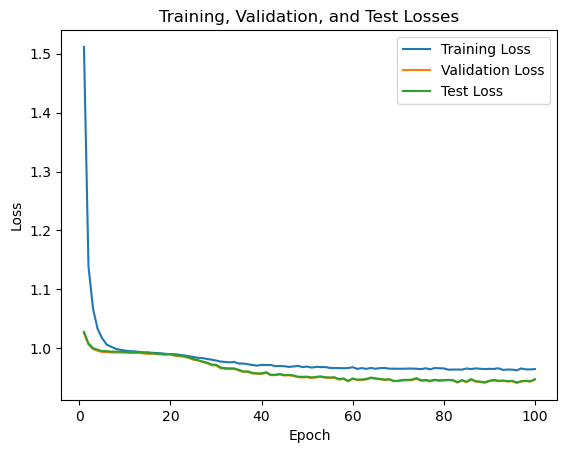

In [86]:
# Parameters
batch_size = 58
input_size = X_train_tensor.shape[1]
hidden_size = 30  # Number of neurons in the hidden layer
output_size = 1  # As a regression task
learning_rate = 0.0001
model = ComplexModel(input_size, hidden_size, output_size)

# Create data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Xavier initialization
for layer in [model.fc1, model.fc2, model.fc3, model.out]:
    nn.init.xavier_uniform_(layer.weight)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Using Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.01)




# Training loop Validation and Test loop
train_losses = []
valid_losses = []
test_losses = []

num_epochs = 100
for epoch in range(num_epochs):
    train_loss = 0
    valid_loss = 0
    test_loss = 0
    
    model.train()  
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    model.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item() * inputs.size(0)
            
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
    
    # Calculate average loss per sample for the epoch
    train_loss /= len(train_loader.dataset)
    valid_loss /= len(val_loader.dataset)
    test_loss /= len(test_loader.dataset)
    
    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}, Test Loss: {test_loss:.4f}')
    
    # Append losses to the lists
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    test_losses.append(test_loss)

# Evaluation 
model.eval()  
with torch.no_grad():
    train_loss = 0
    for inputs, labels in train_loader:
        outputs = model(inputs)
        train_loss += criterion(outputs, labels).item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    print(f'Train Loss: {train_loss:.4f}')

model.eval()  
with torch.no_grad():
    val_loss = 0
    for inputs, labels in val_loader:
        outputs = model(inputs)
        val_loss += criterion(outputs, labels).item() * inputs.size(0)
    val_loss /= len(val_loader.dataset)
    print(f'Validation Loss: {val_loss:.4f}')

model.eval()  
with torch.no_grad():
    test_loss = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        test_loss += criterion(outputs, labels).item() * inputs.size(0)
    test_loss /= len(test_loader.dataset)
    print(f'Test Loss: {test_loss:.4f}')

import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), valid_losses, label='Validation Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Losses')
plt.legend()
plt.show()


Epoch [1/500], Train Loss: 2.0678, Valid Loss: 1.1876, Test Loss: 1.1890
Epoch [2/500], Train Loss: 1.6564, Valid Loss: 1.0898, Test Loss: 1.0898
Epoch [3/500], Train Loss: 1.4667, Valid Loss: 1.0555, Test Loss: 1.0555
Epoch [4/500], Train Loss: 1.3806, Valid Loss: 1.0405, Test Loss: 1.0406
Epoch [5/500], Train Loss: 1.3257, Valid Loss: 1.0359, Test Loss: 1.0361
Epoch [6/500], Train Loss: 1.2729, Valid Loss: 1.0248, Test Loss: 1.0252
Epoch [7/500], Train Loss: 1.2419, Valid Loss: 1.0204, Test Loss: 1.0207
Epoch [8/500], Train Loss: 1.2141, Valid Loss: 1.0157, Test Loss: 1.0163
Epoch [9/500], Train Loss: 1.1936, Valid Loss: 1.0119, Test Loss: 1.0126
Epoch [10/500], Train Loss: 1.1683, Valid Loss: 1.0093, Test Loss: 1.0099
Epoch [11/500], Train Loss: 1.1552, Valid Loss: 1.0072, Test Loss: 1.0077
Epoch [12/500], Train Loss: 1.1399, Valid Loss: 1.0044, Test Loss: 1.0052
Epoch [13/500], Train Loss: 1.1253, Valid Loss: 1.0032, Test Loss: 1.0041
Epoch [14/500], Train Loss: 1.1170, Valid Loss:

Epoch [112/500], Train Loss: 0.9916, Valid Loss: 0.9873, Test Loss: 0.9881
Epoch [113/500], Train Loss: 0.9912, Valid Loss: 0.9875, Test Loss: 0.9883
Epoch [114/500], Train Loss: 0.9906, Valid Loss: 0.9872, Test Loss: 0.9880
Epoch [115/500], Train Loss: 0.9908, Valid Loss: 0.9868, Test Loss: 0.9877
Epoch [116/500], Train Loss: 0.9908, Valid Loss: 0.9866, Test Loss: 0.9875
Epoch [117/500], Train Loss: 0.9904, Valid Loss: 0.9869, Test Loss: 0.9877
Epoch [118/500], Train Loss: 0.9902, Valid Loss: 0.9869, Test Loss: 0.9877
Epoch [119/500], Train Loss: 0.9903, Valid Loss: 0.9868, Test Loss: 0.9877
Epoch [120/500], Train Loss: 0.9909, Valid Loss: 0.9866, Test Loss: 0.9874
Epoch [121/500], Train Loss: 0.9897, Valid Loss: 0.9864, Test Loss: 0.9873
Epoch [122/500], Train Loss: 0.9907, Valid Loss: 0.9867, Test Loss: 0.9875
Epoch [123/500], Train Loss: 0.9897, Valid Loss: 0.9863, Test Loss: 0.9871
Epoch [124/500], Train Loss: 0.9897, Valid Loss: 0.9865, Test Loss: 0.9873
Epoch [125/500], Train Lo

Epoch [222/500], Train Loss: 0.9744, Valid Loss: 0.9680, Test Loss: 0.9684
Epoch [223/500], Train Loss: 0.9752, Valid Loss: 0.9667, Test Loss: 0.9671
Epoch [224/500], Train Loss: 0.9751, Valid Loss: 0.9680, Test Loss: 0.9683
Epoch [225/500], Train Loss: 0.9742, Valid Loss: 0.9670, Test Loss: 0.9673
Epoch [226/500], Train Loss: 0.9739, Valid Loss: 0.9667, Test Loss: 0.9671
Epoch [227/500], Train Loss: 0.9735, Valid Loss: 0.9658, Test Loss: 0.9661
Epoch [228/500], Train Loss: 0.9753, Valid Loss: 0.9664, Test Loss: 0.9667
Epoch [229/500], Train Loss: 0.9738, Valid Loss: 0.9656, Test Loss: 0.9659
Epoch [230/500], Train Loss: 0.9739, Valid Loss: 0.9666, Test Loss: 0.9670
Epoch [231/500], Train Loss: 0.9731, Valid Loss: 0.9654, Test Loss: 0.9657
Epoch [232/500], Train Loss: 0.9734, Valid Loss: 0.9647, Test Loss: 0.9650
Epoch [233/500], Train Loss: 0.9735, Valid Loss: 0.9650, Test Loss: 0.9654
Epoch [234/500], Train Loss: 0.9729, Valid Loss: 0.9637, Test Loss: 0.9640
Epoch [235/500], Train Lo

Epoch [332/500], Train Loss: 0.9603, Valid Loss: 0.9466, Test Loss: 0.9464
Epoch [333/500], Train Loss: 0.9609, Valid Loss: 0.9442, Test Loss: 0.9440
Epoch [334/500], Train Loss: 0.9601, Valid Loss: 0.9435, Test Loss: 0.9434
Epoch [335/500], Train Loss: 0.9610, Valid Loss: 0.9451, Test Loss: 0.9449
Epoch [336/500], Train Loss: 0.9599, Valid Loss: 0.9439, Test Loss: 0.9437
Epoch [337/500], Train Loss: 0.9603, Valid Loss: 0.9416, Test Loss: 0.9414
Epoch [338/500], Train Loss: 0.9596, Valid Loss: 0.9429, Test Loss: 0.9428
Epoch [339/500], Train Loss: 0.9603, Valid Loss: 0.9432, Test Loss: 0.9430
Epoch [340/500], Train Loss: 0.9591, Valid Loss: 0.9434, Test Loss: 0.9434
Epoch [341/500], Train Loss: 0.9601, Valid Loss: 0.9428, Test Loss: 0.9426
Epoch [342/500], Train Loss: 0.9593, Valid Loss: 0.9439, Test Loss: 0.9438
Epoch [343/500], Train Loss: 0.9603, Valid Loss: 0.9429, Test Loss: 0.9426
Epoch [344/500], Train Loss: 0.9589, Valid Loss: 0.9418, Test Loss: 0.9418
Epoch [345/500], Train Lo

Epoch [442/500], Train Loss: 0.9529, Valid Loss: 0.9316, Test Loss: 0.9316
Epoch [443/500], Train Loss: 0.9523, Valid Loss: 0.9302, Test Loss: 0.9301
Epoch [444/500], Train Loss: 0.9527, Valid Loss: 0.9306, Test Loss: 0.9303
Epoch [445/500], Train Loss: 0.9526, Valid Loss: 0.9301, Test Loss: 0.9298
Epoch [446/500], Train Loss: 0.9533, Valid Loss: 0.9307, Test Loss: 0.9304
Epoch [447/500], Train Loss: 0.9521, Valid Loss: 0.9297, Test Loss: 0.9293
Epoch [448/500], Train Loss: 0.9524, Valid Loss: 0.9293, Test Loss: 0.9290
Epoch [449/500], Train Loss: 0.9535, Valid Loss: 0.9301, Test Loss: 0.9298
Epoch [450/500], Train Loss: 0.9532, Valid Loss: 0.9303, Test Loss: 0.9300
Epoch [451/500], Train Loss: 0.9529, Valid Loss: 0.9297, Test Loss: 0.9294
Epoch [452/500], Train Loss: 0.9526, Valid Loss: 0.9298, Test Loss: 0.9294
Epoch [453/500], Train Loss: 0.9524, Valid Loss: 0.9318, Test Loss: 0.9316
Epoch [454/500], Train Loss: 0.9527, Valid Loss: 0.9297, Test Loss: 0.9295
Epoch [455/500], Train Lo

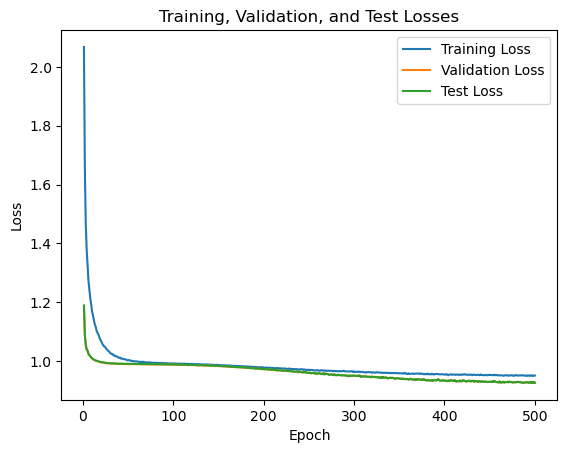

In [80]:
# Parameters
batch_size = 58
input_size = X_train_tensor.shape[1]
hidden_size = 41  # Number of neurons in the hidden layer
output_size = 1  # As a regression task
learning_rate = 0.00001
model = ComplexModel(input_size, hidden_size, output_size)

# Create data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Xavier initialization
for layer in [model.fc1, model.fc2, model.fc3, model.out]:
    nn.init.xavier_uniform_(layer.weight)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Using Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.01)




# Training loop Validation and Test loop
train_losses = []
valid_losses = []
test_losses = []

num_epochs = 500
for epoch in range(num_epochs):
    train_loss = 0
    valid_loss = 0
    test_loss = 0
    
    model.train()  
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    model.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item() * inputs.size(0)
            
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
    
    # Calculate average loss per sample for the epoch
    train_loss /= len(train_loader.dataset)
    valid_loss /= len(val_loader.dataset)
    test_loss /= len(test_loader.dataset)
    
    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}, Test Loss: {test_loss:.4f}')
    
    # Append losses to the lists
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    test_losses.append(test_loss)

# Evaluation 
model.eval()  
with torch.no_grad():
    train_loss = 0
    for inputs, labels in train_loader:
        outputs = model(inputs)
        train_loss += criterion(outputs, labels).item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    print(f'Train Loss: {train_loss:.4f}')

model.eval()  
with torch.no_grad():
    val_loss = 0
    for inputs, labels in val_loader:
        outputs = model(inputs)
        val_loss += criterion(outputs, labels).item() * inputs.size(0)
    val_loss /= len(val_loader.dataset)
    print(f'Validation Loss: {val_loss:.4f}')

model.eval()  
with torch.no_grad():
    test_loss = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        test_loss += criterion(outputs, labels).item() * inputs.size(0)
    test_loss /= len(test_loader.dataset)
    print(f'Test Loss: {test_loss:.4f}')

import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), valid_losses, label='Validation Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Losses')
plt.legend()
plt.show()


/var/folders/x7/_r8bw_1n571f46bh_8p4kw3m0000gp/T/ipykernel_98787/1998358245.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(Time_str, rotation=90)


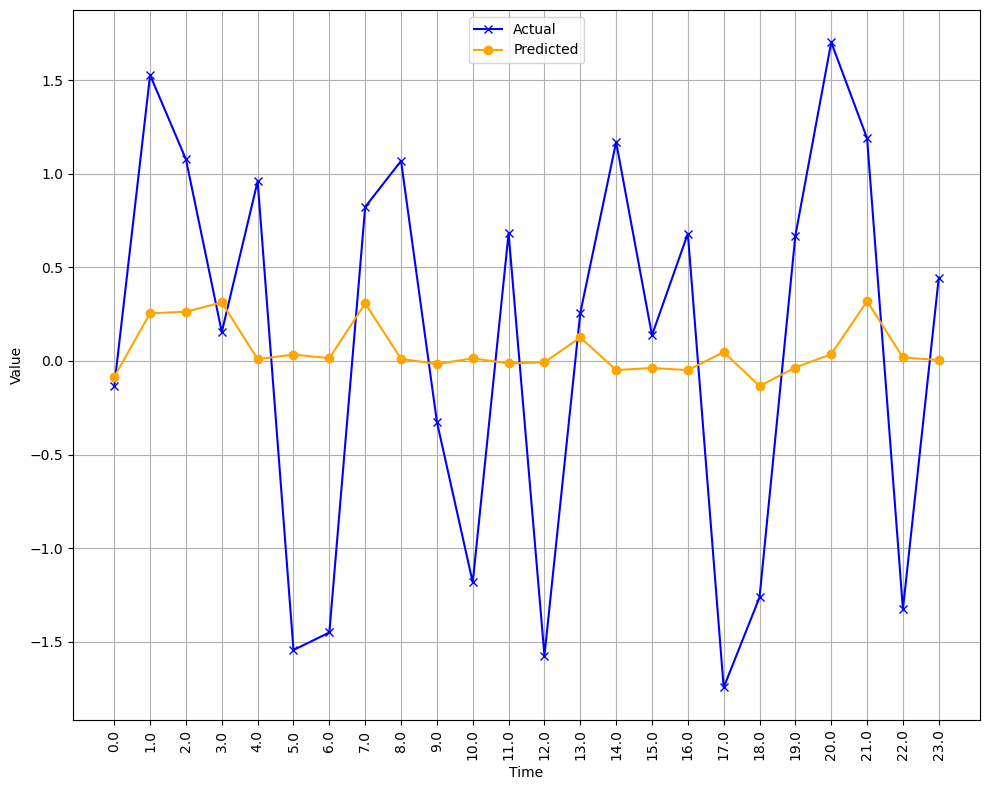

In [83]:
actual_values = []  
predicted_values = []  

Time = df['hour'][:24]
Time_str = [str(hour) for hour in Time]

for inputs, labels in test_loader:
    outputs = model(inputs)
    actual_values.extend(labels.detach().numpy())
    predicted_values.extend(outputs.detach().numpy())


fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Time_str, actual_values[:24], color='blue',marker='x', label='Actual')
ax.plot(Time_str, predicted_values[:24], color='orange', marker='o', label='Predicted')

ax.set_xlabel('Time')
ax.set_ylabel('Value')

ax.legend(loc='upper center')

ax.set_xticklabels(Time_str, rotation=90)

ax.grid(True)

plt.tight_layout()
plt.show()


In [29]:
# Convert the losses into PyTorch tensors
train_loss_tensor = torch.tensor(train_loss)
val_loss_tensor = torch.tensor(val_loss)
test_loss_tensor = torch.tensor(test_loss)

# Calculate RMSE
train_rmse = torch.sqrt(train_loss_tensor)
val_rmse = torch.sqrt(val_loss_tensor)
test_rmse = torch.sqrt(test_loss_tensor)

# Print the RMSE values
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Validation RMSE: {val_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')


Train RMSE: 0.9837
Validation RMSE: 0.9848
Test RMSE: 0.9854


In [85]:
from sklearn.metrics import r2_score

# Switch model to evaluation mode
model.eval()

# Lists to store actual and predicted values
actual_values = []
predicted_values = []

# Iterate over the validation or test loader
with torch.no_grad():
    for inputs, labels in val_loader:  # Use val_loader or test_loader
        outputs = model(inputs)
        actual_values.extend(labels.tolist())
        predicted_values.extend(outputs.tolist())

# Calculate R^2 score
r2 = r2_score(actual_values, predicted_values)
print("Val R^2 score:", r2)


from sklearn.metrics import r2_score

# Switch model to evaluation mode
model.eval()

# Lists to store actual and predicted values
actual_values = []
predicted_values = []

# Iterate over the validation or test loader
with torch.no_grad():
    for inputs, labels in test_loader:  # Use val_loader or test_loader
        outputs = model(inputs)
        actual_values.extend(labels.tolist())
        predicted_values.extend(outputs.tolist())

# Calculate R^2 score
r2 = r2_score(actual_values, predicted_values)
print("Test R^2 score:", r2)


Val R^2 score: 0.05341964665730625
Test R^2 score: 0.054866015191334605
